### 필수과제 
- sklean에서 제공하는 california housing 데이터 존재 코드 공유 예정
- 집값 다른 여러 피처들이 존재
- 전체 피처를 학습하고 MSE 계산한 것과, 여러분들이 직접 filter 방식으로 상관계수를 통해 피처를 선택해서 학습한 후 mse 비교
- 어떤 피처를 선택했는지, 그리고 추가로 집값에 대한 데이터라 도메인을 좀 더 추가해서 어떤 식으로 선택하면 더 좋을지 추가!

#### 1. 데이터 확인

In [15]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# 캘리포니아 주택 데이터셋 불러오기
california = fetch_california_housing()
x = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

In [99]:
# 데이터 정보
print(california.DESCR)
x

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   

            Latitude  Longitude  
MedInc     -0.079809  -0.015176  
HouseAge    0.011173  -0.108197  
AveRooms    0.106389  -0.027540  
AveBedrms   0.069721   0.013344  
Population -0.108785   0.099773  
AveOccup    0.002366   0.002476  
Latitude    1.000000  -0.924664  
Longitude  -0.924664   1.000000  


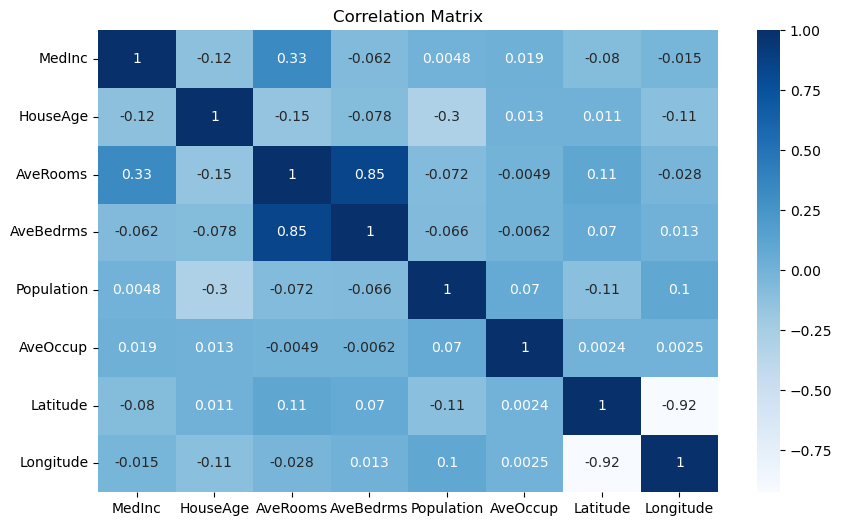

In [63]:
# 피쳐 상관관계
corr_matrix = x.corr()
print(corr_matrix)

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True,cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [38]:
threshold = 0.8
to_drop = set()

# 상관계수 높은 피쳐 선택
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > threshold:
            to_drop.add(corr_matrix.columns[i])
print(to_drop)

{'AveBedrms', 'Longitude'}


### 2. 피쳐 학습 및 MSE 비교

In [102]:
# 선형회귀 (전체 피쳐)

x_train_full, x_test_full, y_train_full, y_test_full = train_test_split(x, y, test_size = 0.2, random_state = 111)

model_full = LinearRegression()
model_full.fit(x_train_full, y_train_full)

y_pred_full = model_full.predict(x_test_full)
mse_full = mean_squared_error(y_test_full, y_pred_full)

In [103]:
# 선형회귀 (선택된 피쳐)

x_selected = x.drop(['AveBedrms', 'Longitude'], axis=1)
x_train_selected, x_test_selected, y_train_selected, y_test_selected = train_test_split(x_selected, y, test_size = 0.2, random_state = 111)

model_selected = LinearRegression()
model_selected.fit(x_train_selected, y_train_selected)

y_pred_selected = model_selected.predict(x_test_selected)
mse_selected = mean_squared_error(y_test_selected, y_pred_selected)

In [104]:
print('MSE_Full :', mse_full)
print('MSE_Selected :', mse_selected)

MSE_Full : 0.5405661575783067
MSE_Selected : 0.6648951891632684


### 3. 피쳐 학습 재시도 (도메인 영역 고려)

In [150]:
# 선형회귀 (선택된 피쳐)
# 거주 인원 수, 방 개수, 침실 개수는 관련 있다 

x_selected_t1 = x[['AveOccup', 'AveRooms', 'AveBedrms']]
x_train_selected_t1, x_test_selected_t1, y_train_selected_t1, y_test_selected_t1 = train_test_split(x_selected_t1, y, test_size = 0.2, random_state = 111)

model_selected_t1 = LinearRegression()
model_selected_t1.fit(x_train_selected_t1, y_train_selected_t1)

y_pred_selected_t1 = model_selected_t1.predict(x_test_selected_t1)
mse_selected_t1 = mean_squared_error(y_test_selected_t1, y_pred_selected_t1)
mse_selected_t1 


1.1703257355220413

In [184]:
# 선형회귀 (선택된 피쳐)
# 중위 소득, 거주 인원 수, 인구 수는 관련 있다

x_selected_t2 = x[['MedInc', 'AveOccup', 'Population']]
x_train_selected_t2, x_test_selected_t2, y_train_selected_t2, y_test_selected_t2 = train_test_split(x_selected_t2, y, test_size = 0.2, random_state = 111)

model_selected_t2 = LinearRegression()
model_selected_t2.fit(x_train_selected_t2, y_train_selected_t2)

y_pred_selected_t2 = model_selected_t2.predict(x_test_selected_t2)
mse_selected_t2 = mean_squared_error(y_test_selected_t2, y_pred_selected_t2)
mse_selected_t2

0.7265902481882893

In [160]:
# 선형회귀 (선택된 피쳐)
# 건축연도, 중위 소득, 위도, 경도는 관련 있다

x_selected_t3 = x[['HouseAge','MedInc', 'Latitude', 'Longitude']]
x_train_selected_t3, x_test_selected_t3, y_train_selected_t3, y_test_selected_t3 = train_test_split(x_selected_t3, y, test_size = 0.2, random_state = 111)

model_selected_t3 = LinearRegression()
model_selected_t3.fit(x_train_selected_t3, y_train_selected_t3)

y_pred_selected_t3 = model_selected_t3.predict(x_test_selected_t3)
mse_selected_t3 = mean_squared_error(y_test_selected_t3, y_pred_selected_t3)
mse_selected_t3

0.5597193697866916

In [186]:
# MSE 비교 결과

print('Full      :', mse_full)        # 전체 피쳐 선택
print('Selected1 :', mse_selected)    # 피쳐 간 다중공선성 제거
print('Selected2 :', mse_selected_t1) # 피쳐 중 거주 인원, 방, 침실 수 선택
print('Selected3 :', mse_selected_t2) # 피쳐 중 거주 인원, 중위 소득, 거주 인원, 인구 수 선택
print('Selected4 :', mse_selected_t3) # 피쳐 중 거주 인원, 중위 소득, 위도, 경도 선택

Full      : 0.5405661575783067
Selected1 : 0.6648951891632684
Selected2 : 1.1703257355220413
Selected3 : 0.7265902481882893
Selected4 : 0.5597193697866916
